# Embedding method for phase diagram estimation

In [3]:
import numpy as np

# Generate random parameters and correspomding trajectories
data_container = np.load('data_container.npy')
random_coords = np.load('random_coords.npy')

# Construct embedding of state tensor into 2d space
embedding = np.load('embedding.npy')
embedding_finite_volume_phases = np.load('embedding_finite_volume_phases.npy')

from keras.models import load_model

# Load model for phase prediction
model = load_model('my_model.h5')

Using TensorFlow backend.







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


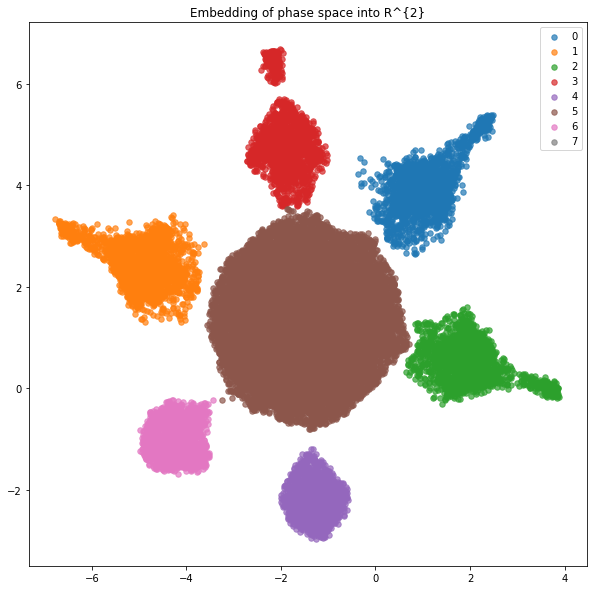

In [4]:
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

Data = {'x': embedding[::,0],
        'y': embedding[::,1]
       }

df = DataFrame(Data,columns=['x','y'])

import hdbscan

labels = hdbscan.HDBSCAN(
    min_samples=100,
    min_cluster_size=750,
).fit_predict(embedding)

def plt_cls(idx):
    t = embedding[labels==idx]
    plt.scatter(t[:,0], t[:,1], alpha=0.7, s=30, label=idx)
    
plt.figure(figsize=(10,10))
labels__ = []
for i in range(len(set(labels))):
    plt_cls(i)
    labels__.append(str(i))
plt.legend(labels__);
plt.title('Embedding of phase space into R^{2}');

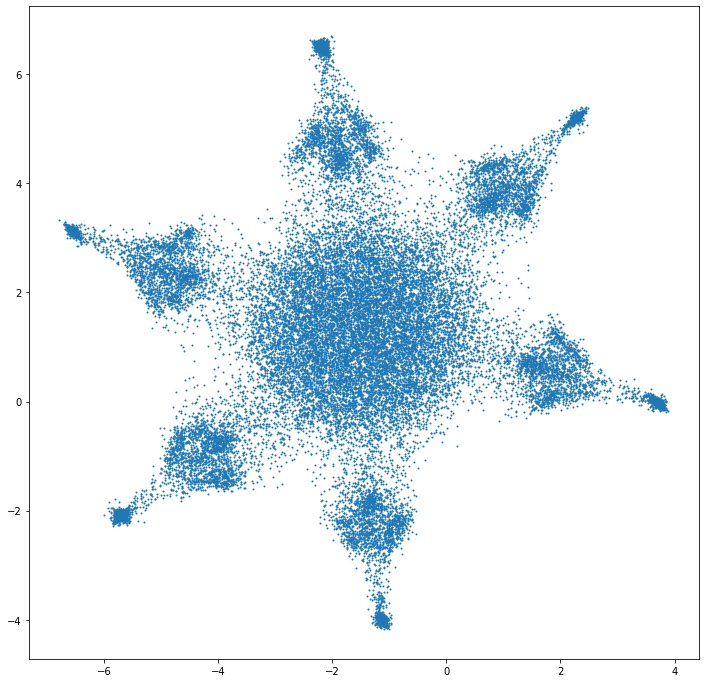

In [5]:
plt.figure(figsize=(12,12))
plt.scatter(embedding[:,0], embedding[:,1], s=1)

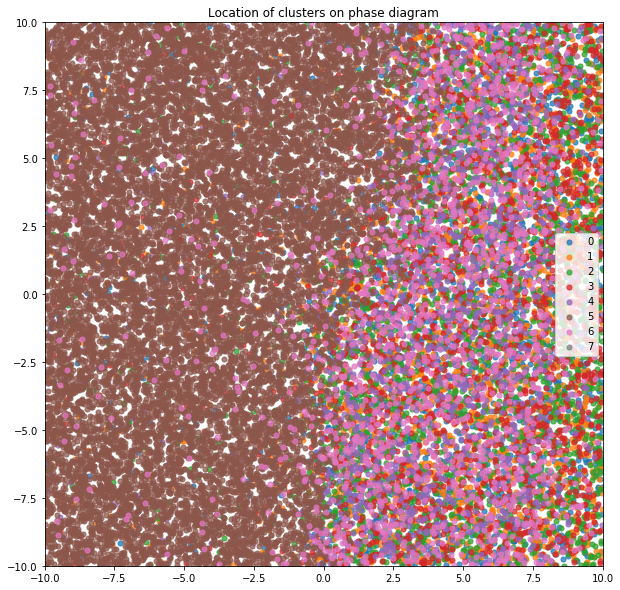

In [6]:
def plt_cls(idx):
    t = np.log(random_coords[labels==idx])
    plt.scatter(t[:,0], t[:,1], alpha=0.75, s=26, label=idx)
    
plt.figure(figsize=(10,10))
labels__ = []
for i in range(len(set(labels))):
    plt_cls(i)
    labels__.append(str(i))
plt.legend(labels__)
plt.xlim((-10,10))
plt.ylim((-10,10));
plt.title('Location of clusters on phase diagram');

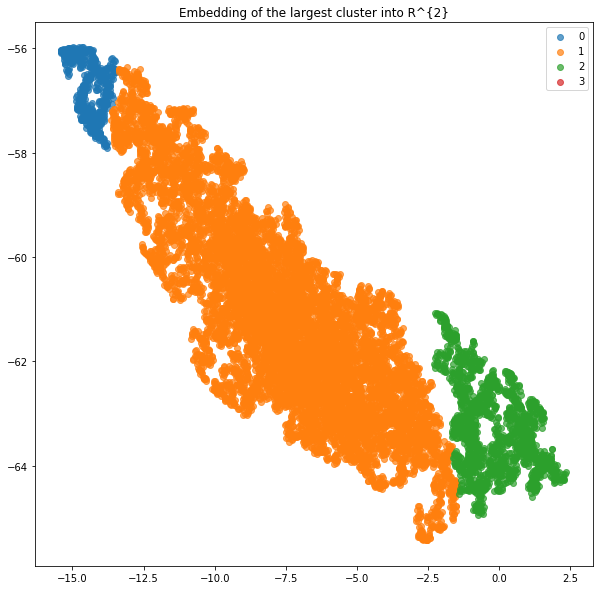

In [7]:
import hdbscan

labels_finite = hdbscan.HDBSCAN(
    min_samples=4,
    min_cluster_size=250,
).fit_predict(embedding_finite_volume_phases)

def plt_cls_without_0(idx):
    t = embedding_finite_volume_phases[labels_finite==idx]
    plt.scatter(t[:,0], t[:,1], alpha=0.7)
plt.figure(figsize=(10,10))
labels___ = []
for i in range(len(set(labels_finite))):
    plt_cls_without_0(i)
    labels___.append(str(i))
plt.legend(labels___)
plt.title('Embedding of the largest cluster into R^{2}');

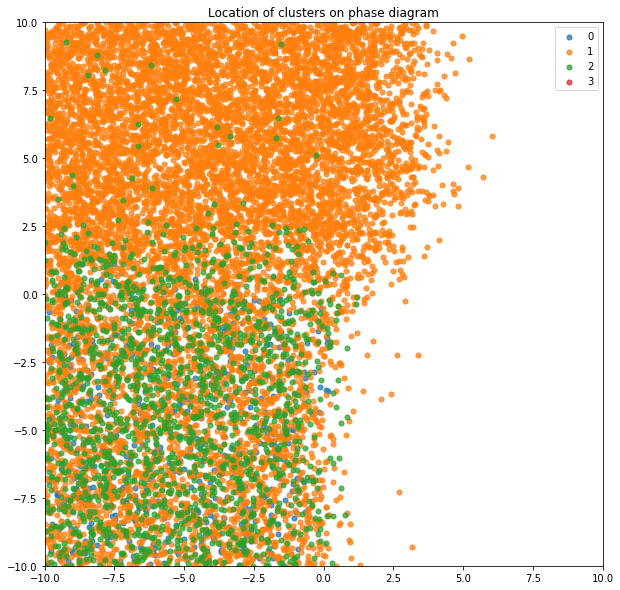

In [8]:
def plt_cls(idx):
    t = np.log(random_coords[labels==5][labels_finite==idx])
    plt.scatter(t[:,0], t[:,1], alpha=0.75, s=26, label=idx)
    
plt.figure(figsize=(10,10))
labels__ = []
for i in range(len(set(labels_finite))):
    plt_cls(i)
    labels__.append(str(i))
plt.legend(labels__)
plt.xlim((-10,10))
plt.ylim((-10,10));
plt.title('Location of clusters on phase diagram');

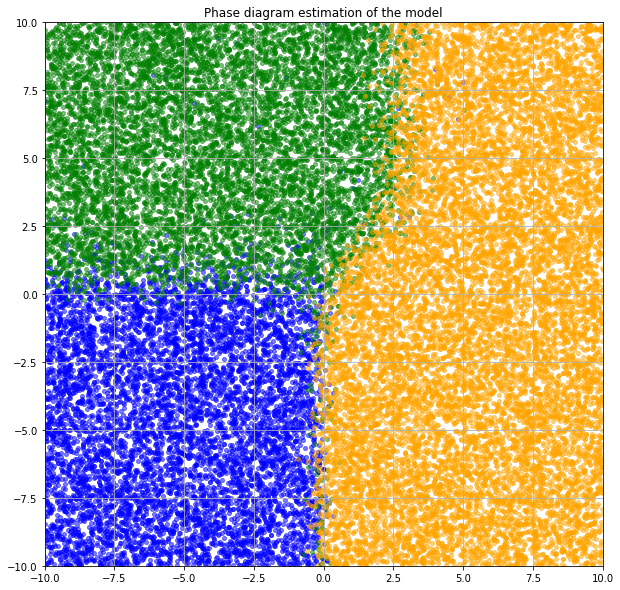

In [9]:
x_full = data_container.reshape(data_container.shape[0],data_container.shape[1],data_container.shape[2],1)
x_full = np.asarray(x_full, dtype=np.float32)
for i in range(len(x_full)):
    x_full[i] = (x_full[i]-np.mean(x_full[i]))/np.std(x_full[i])

res_test = model.predict(x_full)
predicted_labels = np.argmax(res_test, axis=1)
predicted_cluster_0 = np.log(random_coords[predicted_labels==0])
predicted_cluster_1 = np.log(random_coords[predicted_labels==1])
predicted_cluster_2 = np.log(random_coords[predicted_labels==2])

plt.figure(figsize=(10,10))
plt.grid();
plt.scatter(predicted_cluster_0[:,0], predicted_cluster_0[:,1], s=16, alpha=0.5, c='blue')
plt.scatter(predicted_cluster_1[:,0], predicted_cluster_1[:,1], s=16, alpha=0.5, c='green')
plt.scatter(predicted_cluster_2[:,0], predicted_cluster_2[:,1], s=16, alpha=0.5, c='orange')
plt.xlim((-10,10))
plt.ylim((-10,10))
plt.title('Phase diagram estimation of the model');
plt.show();

In [29]:

x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [51]:
x = x_test[435]
x = x[np.newaxis,:]
OutFunc = K.function([model.input], [model.layers[4].output])
out_val = OutFunc([x])[0]

In [39]:
x_test.shape

(1941, 500, 3, 1)

In [52]:
out_val.shape

(1, 48)

In [53]:
out_val

array([[0.        , 0.        , 0.        , 0.09576548, 0.        ,
        0.        , 0.        , 0.        , 0.29801702, 0.0820481 ,
        0.        , 0.        , 0.        , 0.38940436, 0.        ,
        0.        , 0.        , 0.        , 0.30855745, 0.        ,
        0.24882911, 0.        , 0.23920074, 0.        , 0.21229371,
        0.22324021, 0.2241225 , 0.28221363, 0.        , 0.        ,
        0.        , 0.        , 0.11707421, 0.12061301, 0.07753368,
        0.28780133, 0.16225645, 0.28982338, 0.30177104, 0.00600526,
        0.        , 0.        , 0.02208512, 0.        , 0.3257745 ,
        0.20472851, 0.08259784, 0.17204063]], dtype=float32)

In [48]:
out_val

array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [33]:
from keras import backend as K

OutFunc = K.function([model.input], [model.layers[2].output])
out_val = OutFunc([x])[0]

In [28]:
full_x = np.r_[x_train, x_test]
full_y = np.r_[y_train, y_test]

In [49]:
full_x.shape

(7764, 500, 3, 1)

In [58]:
x_full = data_container.reshape(data_container.shape[0],data_container.shape[1],data_container.shape[2],1)
x_full = np.asarray(x_full, dtype=np.float32)
for i in range(len(x_full)):
    x_full[i] = (x_full[i]-np.mean(x_full[i]))/np.std(x_full[i])

x = x_test[435]
x = x[np.newaxis,:]
OutFunc = K.function([model.input], [model.layers[4].output])
out_val = OutFunc([x])[0]

feature_extraction = np.zeros((x_full.shape[0], out_val.shape[-1]))

In [59]:
x

array([[[[ 0.00692837],
         [ 1.7390207 ],
         [ 0.00692837]],

        [[ 0.00692837],
         [ 1.7390207 ],
         [ 0.00692837]],

        [[-1.725164  ],
         [ 0.00692837],
         [ 0.00692837]],

        ...,

        [[-1.725164  ],
         [ 0.00692837],
         [ 0.00692837]],

        [[ 0.00692837],
         [-1.725164  ],
         [ 0.00692837]],

        [[ 0.00692837],
         [-1.725164  ],
         [ 0.00692837]]]], dtype=float32)

In [55]:
feature_extraction.shape

(30000, 48)

In [62]:
from progressbar import ProgressBar

pbar = ProgressBar()

OutFunc = K.function([model.input], [model.layers[4].output])

for _ in pbar(range(len(feature_extraction))):
    x = x_full[_]
    x = x[np.newaxis,:]
    out_val = OutFunc([x])[0]
    feature_extraction[_] = out_val

100% |########################################################################|


In [63]:
feature_extraction

array([[0.        , 0.        , 0.        , ..., 0.17087635, 0.06798863,
        0.10830899],
       [0.        , 0.13347964, 0.        , ..., 0.37817067, 0.39970726,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.13694251, 0.04443026,
        0.10132793],
       ...,
       [0.        , 0.33177996, 0.        , ..., 0.56867111, 0.71444041,
        0.        ],
       [0.        , 0.87389928, 0.        , ..., 1.48834622, 1.9206754 ,
        0.        ],
       [0.        , 0.20216237, 0.        , ..., 0.52351403, 0.55422419,
        0.        ]])

In [172]:
%%time
import umap

feature_embedding = umap.UMAP(verbose=True, n_epochs=300).fit_transform(feature_extraction)

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=300,
     n_neighbors=15, negative_sample_rate=5, random_state=None,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=True)
Construct fuzzy simplicial set
Tue Nov 12 22:02:48 2019 Finding Nearest Neighbors
Tue Nov 12 22:02:48 2019 Building RP forest with 14 trees
Tue Nov 12 22:02:48 2019 NN descent for 15 iterations


C:\deeplearning\envs\PythonGPU\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\deeplearning\envs\PythonGPU\lib\site-packages\umap\nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


	 0  /  15
	 1  /  15
	 2  /  15
Tue Nov 12 22:02:52 2019 Finished Nearest Neighbor Search
Tue Nov 12 22:02:53 2019 Construct embedding
	completed  0  /  300 epochs
	completed  30  /  300 epochs
	completed  60  /  300 epochs
	completed  90  /  300 epochs
	completed  120  /  300 epochs
	completed  150  /  300 epochs
	completed  180  /  300 epochs
	completed  210  /  300 epochs
	completed  240  /  300 epochs
	completed  270  /  300 epochs
Tue Nov 12 22:03:30 2019 Finished embedding
Wall time: 42.4 s


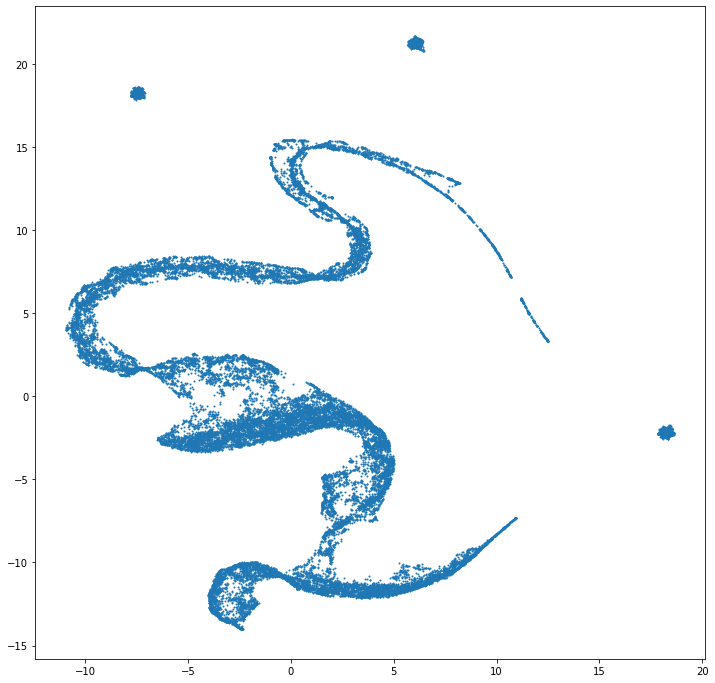

In [173]:
plt.figure(figsize=(12,12))
plt.scatter(feature_embedding[:,0], feature_embedding[:,1], s=1)

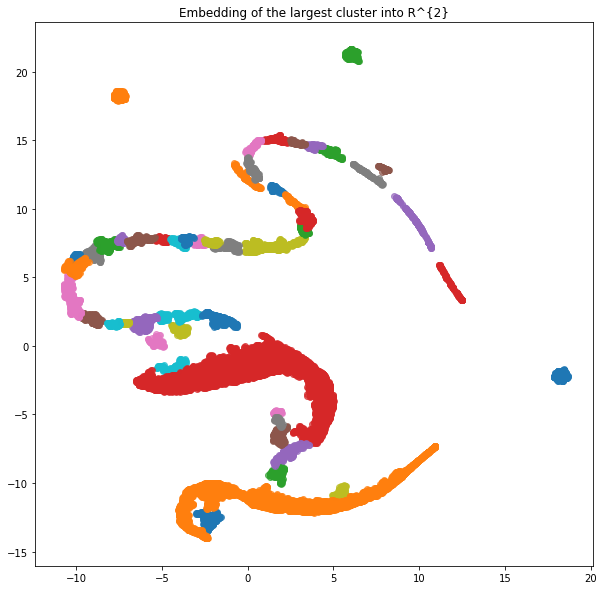

In [190]:
import hdbscan

labels_finite = hdbscan.HDBSCAN(
    min_samples=5,
    min_cluster_size=76,
).fit_predict(feature_embedding)

def plt_cls_without_0(idx):
    t = feature_embedding[labels_finite==idx]
    plt.scatter(t[:,0], t[:,1], alpha=0.7)
plt.figure(figsize=(10,10))
labels___ = []
for i in range(len(set(labels_finite))):
    plt_cls_without_0(i)
    labels___.append(str(i))
#plt.legend(labels___)
plt.title('Embedding of the largest cluster into R^{2}');

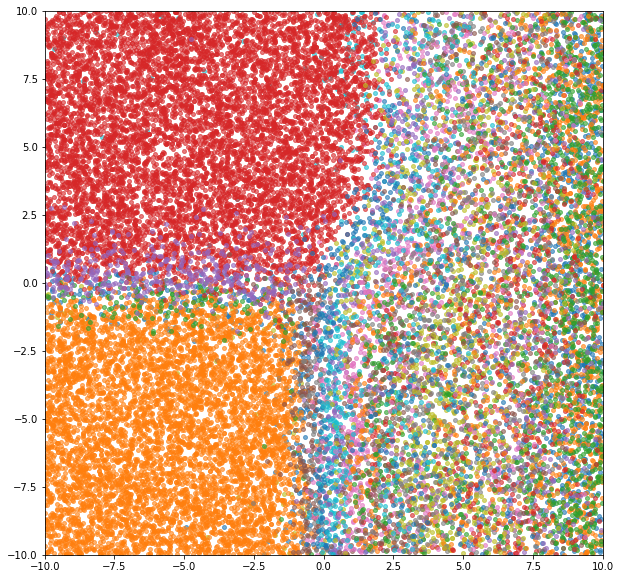

In [188]:
def plt_cls(idx):
    t = np.log(random_coords[labels_finite==idx])
    plt.scatter(t[:,0], t[:,1], alpha=0.6, s=16, label=idx)

plt.figure(figsize=(10,10))
labels__ = []
for i in range(len(set(labels_finite))):
    plt_cls(i)
    labels__.append(str(i))
plt.xlim((-10,10))
plt.ylim((-10,10));

In [2]:
import numpy as np

In [3]:
np.log(10)

2.302585092994046